In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | makat
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | porto seguro
Processing Record 6 of Set 1 | waipawa
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | belmonte
Processing Record 13 of Set 1 | colares
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | kalaleh
Processing Record 16 of Set 1 | qandahar
City not found. Skipping...
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | tautira
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | coihaique
Processing Record 23

Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | dhule
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | biak
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | svetlogorsk
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | pasighat
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | cartagena
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | zhigansk
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | bandar-e lengeh
Processing Record 5 of Set 5 | san cristobal
Processing Record 6 of Set 5 | morogoro
Processing Record 7 of Set 5 | palmital
Processing Record 8 of Set 5 | manaure
Processing Record 9 of Set 5 | grimmen
Processing Record 10 of Set 5 | e

Processing Record 27 of Set 8 | viesca
Processing Record 28 of Set 8 | krasnoarmeysk
Processing Record 29 of Set 8 | marsa matruh
Processing Record 30 of Set 8 | ponta do sol
Processing Record 31 of Set 8 | sorland
Processing Record 32 of Set 8 | toliary
City not found. Skipping...
Processing Record 33 of Set 8 | dali
Processing Record 34 of Set 8 | bam
Processing Record 35 of Set 8 | esna
Processing Record 36 of Set 8 | hovd
Processing Record 37 of Set 8 | terre-de-bas
Processing Record 38 of Set 8 | utete
Processing Record 39 of Set 8 | saint pete beach
Processing Record 40 of Set 8 | mariinsk
Processing Record 41 of Set 8 | mala
Processing Record 42 of Set 8 | salinas
Processing Record 43 of Set 8 | iqaluit
Processing Record 44 of Set 8 | nawabganj
Processing Record 45 of Set 8 | san policarpo
Processing Record 46 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 47 of Set 8 | rosarito
Processing Record 48 of Set 8 | baley
Processing Record 49 of Set 8 | antalya

Processing Record 17 of Set 12 | san quintin
Processing Record 18 of Set 12 | novoomskiy
Processing Record 19 of Set 12 | acajutla
Processing Record 20 of Set 12 | two hills
Processing Record 21 of Set 12 | alekseyevka
Processing Record 22 of Set 12 | miyako
Processing Record 23 of Set 12 | manokwari
Processing Record 24 of Set 12 | saint-louis
Processing Record 25 of Set 12 | hamilton
Processing Record 26 of Set 12 | krasnyy chikoy
Processing Record 27 of Set 12 | milton
Processing Record 28 of Set 12 | santiago del estero
Processing Record 29 of Set 12 | yabrud
Processing Record 30 of Set 12 | port lincoln
Processing Record 31 of Set 12 | halifax
Processing Record 32 of Set 12 | usvyaty
Processing Record 33 of Set 12 | arman
Processing Record 34 of Set 12 | lubango
Processing Record 35 of Set 12 | kashan
Processing Record 36 of Set 12 | port hedland
Processing Record 37 of Set 12 | oriximina
Processing Record 38 of Set 12 | barbar
City not found. Skipping...
Processing Record 39 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,81.28,70,100,15.46,TO,2022-01-31 05:54:41
1,Makat,47.6469,53.3463,30.74,87,92,6.62,KZ,2022-01-31 05:54:41
2,Castro,-24.7911,-50.0119,62.51,99,100,5.46,BR,2022-01-31 05:54:41
3,Port Alfred,-33.5906,26.8910,76.19,79,100,12.44,ZA,2022-01-31 05:54:42
4,Porto Seguro,-16.4497,-39.0647,77.52,94,20,5.75,BR,2022-01-31 05:54:42
5,Waipawa,-41.4122,175.5153,73.45,71,13,8.84,NZ,2022-01-31 05:54:42
6,Busselton,-33.6500,115.3333,79.09,29,92,17.07,AU,2022-01-31 05:54:43
7,Yar-Sale,66.8333,70.8333,-5.46,100,87,6.87,RU,2022-01-31 05:54:43
8,Khatanga,71.9667,102.5000,-6.25,99,98,7.23,RU,2022-01-31 05:54:44
9,Butaritari,3.0707,172.7902,82.06,77,55,18.97,KI,2022-01-31 05:54:44


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-31 05:54:41,-21.2000,-175.2000,81.28,70,100,15.46
1,Makat,KZ,2022-01-31 05:54:41,47.6469,53.3463,30.74,87,92,6.62
2,Castro,BR,2022-01-31 05:54:41,-24.7911,-50.0119,62.51,99,100,5.46
3,Port Alfred,ZA,2022-01-31 05:54:42,-33.5906,26.8910,76.19,79,100,12.44
4,Porto Seguro,BR,2022-01-31 05:54:42,-16.4497,-39.0647,77.52,94,20,5.75
5,Waipawa,NZ,2022-01-31 05:54:42,-41.4122,175.5153,73.45,71,13,8.84
6,Busselton,AU,2022-01-31 05:54:43,-33.6500,115.3333,79.09,29,92,17.07
7,Yar-Sale,RU,2022-01-31 05:54:43,66.8333,70.8333,-5.46,100,87,6.87
8,Khatanga,RU,2022-01-31 05:54:44,71.9667,102.5000,-6.25,99,98,7.23
9,Butaritari,KI,2022-01-31 05:54:44,3.0707,172.7902,82.06,77,55,18.97


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

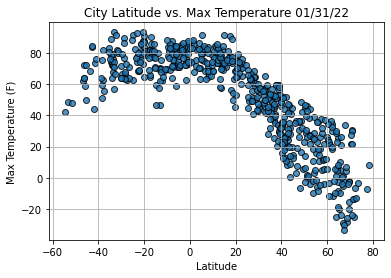

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

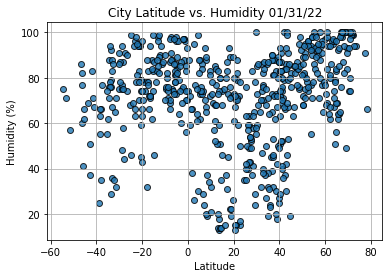

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

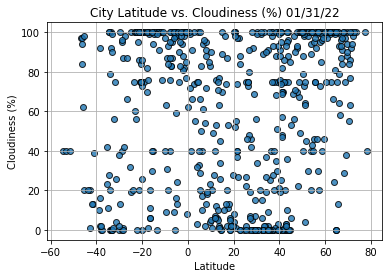

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

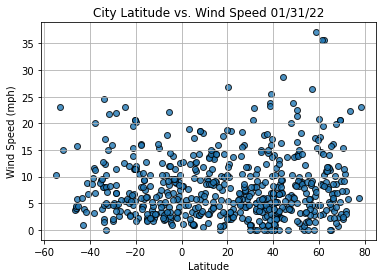

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

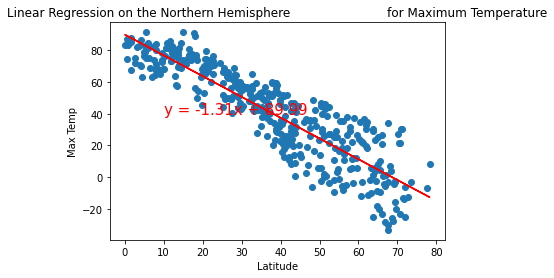

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

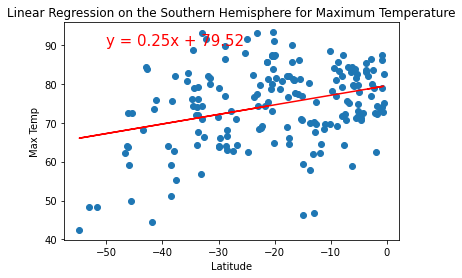

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

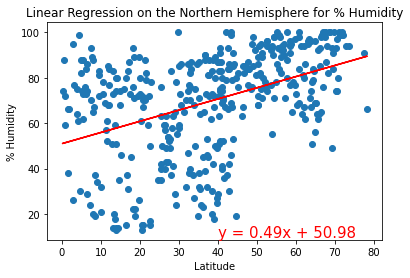

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

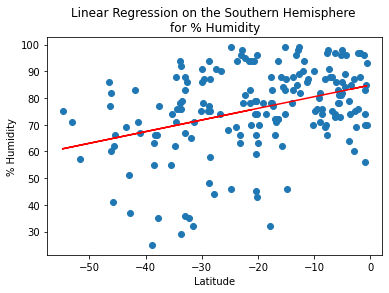

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,0))

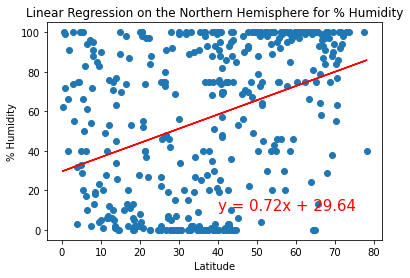

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

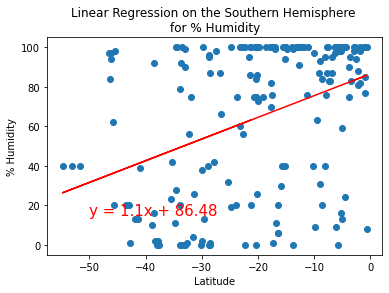

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

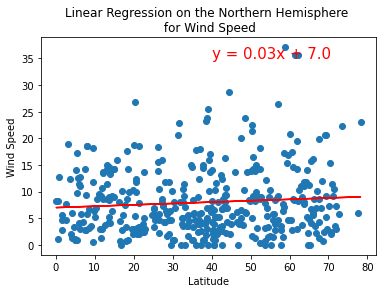

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

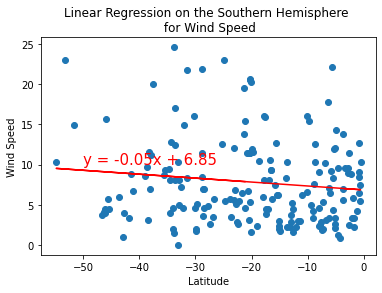

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,10))